In [1]:
# Torch Dependencies
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from torch.autograd import Variable

# Importing Other Dependencies
import csv
import random
from PIL import Image
import math
import time
from tqdm import tqdm
import pickle
import datetime

In [2]:
# Function for showing image from vector form (4725 long numpy vector)
def show_img_vec(img_vec):
    img_vec_shaped = img_vec.reshape(45,35,3)
    plt.imshow(img_vec_shaped)

In [3]:
# Importing pickle - reduces time to import from .jpg from >3 hours to ~3 seconds.
X_array = pickle.load( open( "X_array.p", "rb" ) )

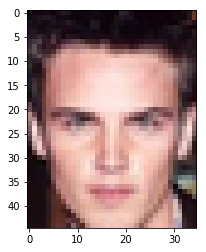

In [4]:
show_img_vec(X_array[200000])

In [5]:
# Creating Model!
# This will be a relatively un-advanced densely connected model that will reduce the size by
    # factor of ~17 (to a 300-dimensional vector) and attempts to reconstruct it. 

class Autoencoder_One(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder_One, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, input_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
    
    def compress(self, x):
        out = self.fc1(x)
        return out

In [7]:
learning_rate = 0.01
num_epochs =  5000

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Setting up data as tensor and Variable
Tensor_X = torch.Tensor(X_array[0:2000])
Variable_X = Variable(Tensor_X)

# Setting up loss function
loss_fn = nn.MSELoss()

# Initializing model
model_1 = Autoencoder_One(4725, 400)

# Setting up optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate, nesterov=True, momentum = 0.9, dampening = 0)

In [ ]:
print("H")
for epoch in range(num_epochs):
    model_1.train()
    optimizer.zero_grad()

    Pred_X = model_1(Variable_X)
    loss = loss_fn(Pred_X, Variable_X)
    loss.backward()
    optimizer.step()

    model_1.eval()
    train_loss.append(float(loss.data))


#     test_results = test_model(simple_rick, testor_y, testor_X, tensor_y, tensor_X)

#     train_accuracy.append(test_results[1])
#     test_accuracy.append(test_results[0])

    if epoch % 100 == 0:
        print("=========="+str(epoch)+"==========")
        print("Loss: ",float(loss))
        print(datetime.datetime.now())
#         print("Test Accuracy: ",test_results[0])
#         print("Train Accuracy: ",test_results[1])
#         out_vec = model_1(Tensor_X[0])
#         out_vec = out_vec.detach().numpy()
#         show_img_vec(out_vec)

H
==========0==========
Loss:  18736.32421875
2019-02-10 14:12:09.322895
==========100==========
Loss:  18440.943359375
2019-02-10 14:12:30.820340
==========200==========
Loss:  18314.130859375
2019-02-10 14:12:53.083827
==========300==========
Loss:  18188.36328125
2019-02-10 14:13:15.405633
==========400==========
Loss:  18063.658203125
2019-02-10 14:13:37.830892
==========500==========
Loss:  17940.00390625
2019-02-10 14:14:00.425412
==========600==========
Loss:  17817.390625
2019-02-10 14:14:22.815926
==========700==========
Loss:  17695.814453125
2019-02-10 14:14:45.553770
==========800==========
Loss:  17575.26171875
2019-02-10 14:15:08.719215
==========900==========
Loss:  17455.7265625
2019-02-10 14:15:35.674108
==========1000==========
Loss:  17337.197265625
2019-02-10 14:16:04.065335
==========1100==========
Loss:  17219.669921875
2019-02-10 14:16:33.364173
==========1200==========
Loss:  17103.1328125
2019-02-10 14:17:02.526555
==========1300==========
Loss:  16987.578125
2

In [ ]:
out_vec = model_1(Tensor_X[3])
out_vec = out_vec.data.numpy()
show_img_vec(out_vec)